In [1]:
# Tensorflow is the main library that is required
import tensorflow as tf
# many datasets are available inside keras
from tensorflow import keras
# numpy allows mathematic manipulations
import numpy as np
# pyplot allows visualizations
from matplotlib import pyplot as plt

In [2]:
# loading the well known handwritten number mnist data (60000 data points)
train, test = keras.datasets.mnist.load_data()

(60000, 28, 28)
34642th data


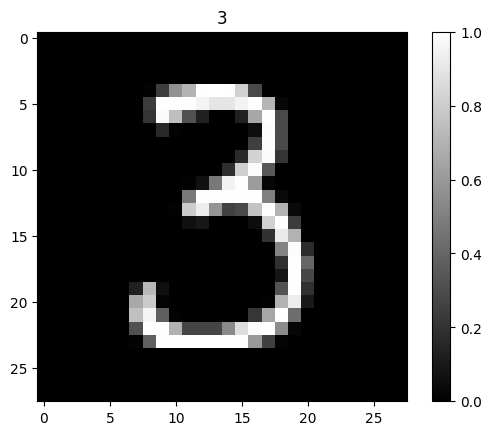

In [3]:
# seeing what I just did
if 1:
    xxx, yyy = train
    print(xxx.shape)

    # choosing a random data
    n = np.random.randint(xxx.shape[0])
    print(f"{n}th data")
    
    # showint them using matplotlib
    plt.imshow(xxx[n]/255.0, cmap="gray")
    # plt.imshow(xxx[n]/255.0)
    plt.colorbar()
    plt.title(f"{yyy[n]}")
    plt.show()

In [5]:
# building the model
a_simple_nn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10)
])
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
a_simple_nn_model.compile(optimizer='adam',
                          loss=loss_function,
                          metrics=['accuracy'])

In [6]:
# training
a_simple_nn_model.fit(train[0], train[1], epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0175 - accuracy: 0.8915
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1996 - accuracy: 0.9471
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1491 - accuracy: 0.9579
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1314 - accuracy: 0.9626
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1120 - accuracy: 0.9686


In [7]:
# evaluation
a_simple_nn_model.evaluate(test[0], test[1], verbose=2)

313/313 - 0s - loss: 0.1375 - accuracy: 0.9622 - 335ms/epoch - 1ms/step


[0.1375211775302887, 0.9621999859809875]

29291th data
Data was 4
Prediction was [[2.8633285e-09 1.4395337e-12 2.0924997e-09 8.4128846e-13 9.9169838e-01
  1.1124874e-06 1.8266231e-08 5.8708429e-06 1.5250892e-08 8.2945917e-03]]


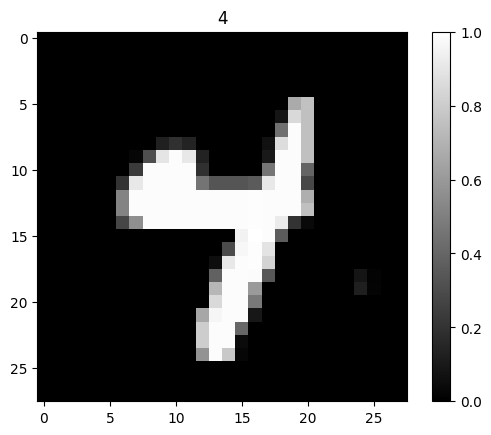

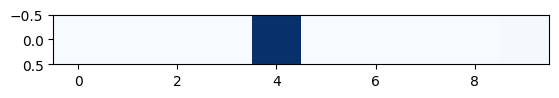

In [94]:
if 1:
    xxx, yyy = train
    # choosing a random data
    n = np.random.randint(xxx.shape[0])

    # since we almost always train and predict from a list:
    # and a list is always 1 dimension higher than a data
    # we add the extra dimension, i.e. make [0,] to [[0,],]
    xx = xxx[n]
    yy = yyy[n]
    
    x = tf.expand_dims(xxx[n], axis=0)

    # predicting that random data
    y_logit = a_simple_nn_model(x)
    y = tf.nn.softmax(y_logit)

    print(f"{n}th data")
    print(f"Data was {yy}")
    print(f"Prediction was {y}")

    # showint them using matplotlib
    plt.imshow(xx/255.0, cmap="gray")
    plt.colorbar()
    plt.title(f"{yy}")

    # plt.text(0, 1, f"Prediction = {y}", color='white')
    plt.show()
    
    plt.imshow(y, cmap='Blues')